## 데이터 탐색
### 데이터의 요약이나 통계 정보를 출력

### 탐색적 시각화 이용

### 히스토그램
#### 빈도 분석을 위해서 그리는 차트
#### 변수가 하나인 단변수 데이터의 빈도 수를 표현

In [12]:
# 기본 작업
import pandas as pd
import numpy as np
# matplotlib 기반의 그래프를 출력할 때 한글을 사용하기 위한 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == 'Darwin' :
    re('font', family='AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      31 non-null     object
 1   선호과일    31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes
None


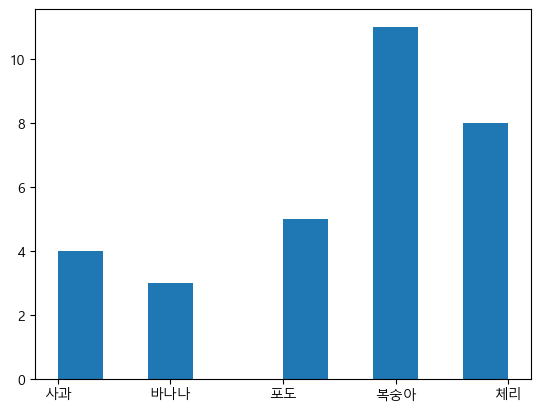

In [17]:
#lovefruits.csv 파일 읽기
# 첫 행이 컬럼 이름
# 구분자는 ,
# 한글이 있음
df = pd.read_csv('./data/data/lovefruits.csv', encoding='ms949')
#print(df)

# 정보 확인
print(df.info())

# 빈도수 확인 - 옵션을 설정하지 않으면 내림차순 설정
data = df['선호과일'].value_counts(sort=False)
#print(data)

plt.hist(df['선호과일'])
plt.show()


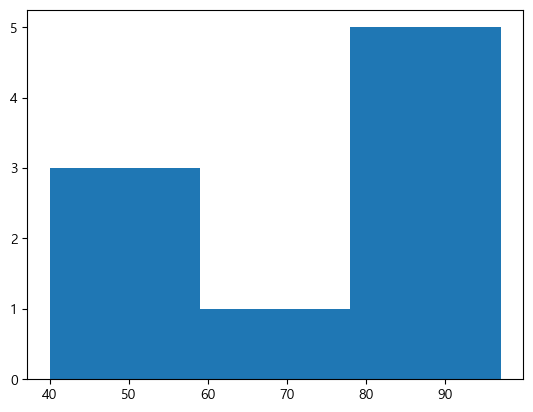

In [24]:
df = pd.read_csv('./data/data/student.csv', encoding="ms949")
#print(df.info())
#정수처럼 여러 값이 존재하는 경우는 되도록이면 구간 별로 히스토그램을 그리는 것이 좋음
plt.hist(df['수학'], bins=3) # 구간을 3개로 지정
plt.show()


### 산포도

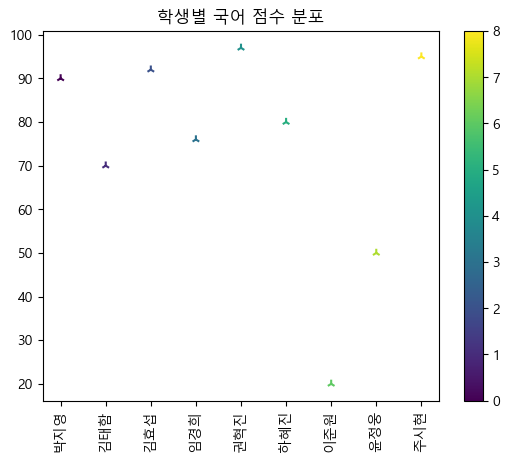

In [37]:
df = pd.read_csv('./data/data/student.csv', encoding="ms949")

plt.figure()
# 색상 설정
colormap = df.index
plt.scatter(x = df.index, y = df['국어'], marker='2', c=colormap) # marker는 모양 바꾸기
plt.xticks(range(0,len(df['국어']),1), df['이름'], rotation='vertical')
plt.colorbar()
plt.title('학생별 국어 점수 분포')

plt.show()

In [38]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  cylinders_size  
0       1  chevrolet chevelle malibu           300.0  
1       1          buick skylark 320           300.0  
2       1         plymouth satellite           300.0  
3       1              amc rebel sst           300.0  
4       1                ford torino           300.0  


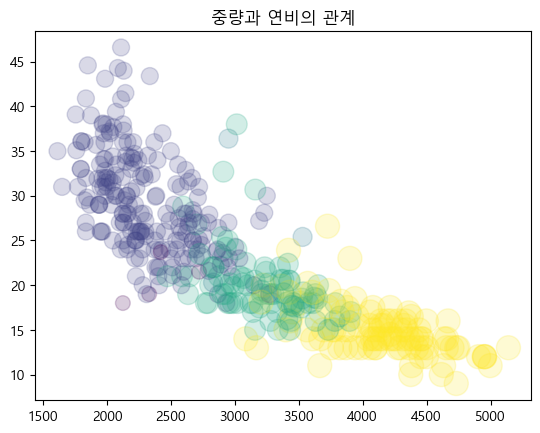

In [50]:
# 여러 개의 컬럼을 이용한 산포도
df = pd.read_csv('./data/data/noheader_auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
#print(df.head())
#존재하지 않는 컬럼이므로 컬럼이 추가됨
df['cylinders_size'] = df['cylinders'] / df.cylinders.max() * 300
print(df.head())
colormap=df['cylinders']
plt.scatter(x=df['weight'],y=df['mpg'], s=df['cylinders_size'], c=colormap, alpha=0.2)
plt.title("중량과 연비의 관계")

plt.show()

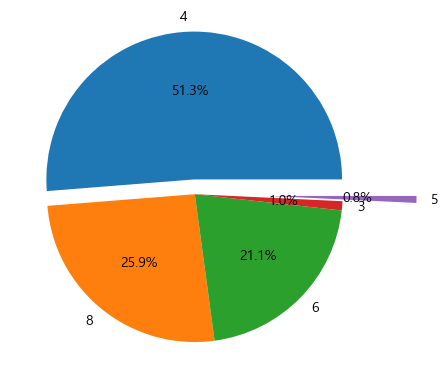

In [60]:
x = df['cylinders'].value_counts()
# print(type(x))
# 중점으로부터 떨어뜨리는 비율
explode=(0.1,0,0,0,0.5) # 조각 만들기
plt.pie(x, labels=x.index, autopct='%1.1f%%',explode=explode) # value_counts() : 빈도수
plt.show()

In [61]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|    

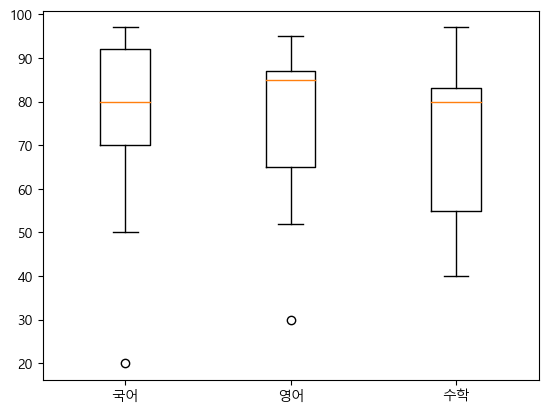

In [66]:
df = pd.read_csv('./data/data/student.csv', encoding='ms949')
#print(df)
plt.boxplot([df['국어'],df['영어'],df['수학']], labels=('국어','영어','수학'))
plt.show()

In [68]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


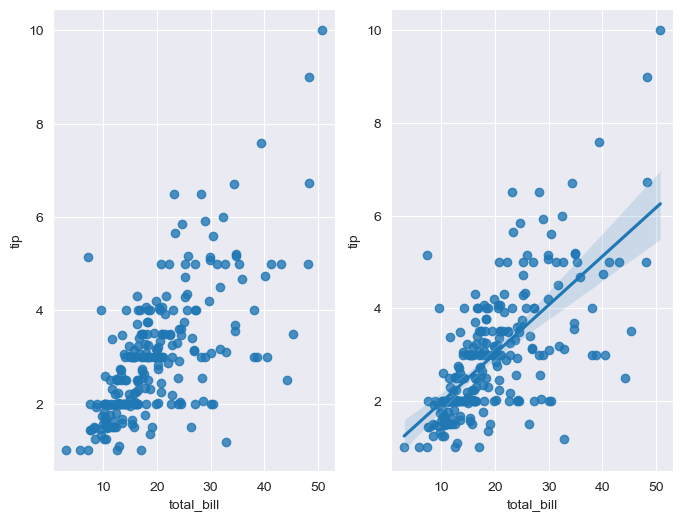

In [71]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.set_style("darkgrid")
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False, ax=ax1)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=True, ax=ax2)
plt.show()

In [91]:
import folium
# 지도를 생성 - location은 중앙점의 위치이고 zoom_start는 확대 축소 배율
m = folium.Map(location = [37.572656, 126.973304], zoom_start = 15)
# 마커 출력
folium.Marker(location=[37.572656, 126.973304], popup="KB카드",icon=folium.Icon(icon='cloud')).add_to(m)
folium.RegularPolygonMarker(location=[37.572656, 126.973304], popup="다각형",number_of_sides=6, radius=30, fill_color='#999999').add_to(m)
# html 파일로 저장
m.save("map.html")
m

In [96]:
df = pd.read_excel('./data/data/서울지역_대학교_위치.xlsx')
#print(df.head())
#print(df.info())

m = folium.Map(location=[37.55,126.98], zoom_start=12)

# DataFrame의 데이터 순회

for name, lat, lng in zip(df['Unnamed: 0'],df['위도'], df['경도']) :
    folium.CircleMarker([lat, lng], radius=10, color='blue', fill=True, fill_color='coral',fill_opacity=0.7, popup=name).add_to(m)

m

In [116]:
# 경기도 인구 단계 구분도
# json 파싱을 위한 패키지
import json

# 경기도 인구 데이터 가져오기
df = pd.read_excel("./data/data/경기도인구데이터.xlsx")
#print(df.head())

#컬럼의 이름이 숫자 형태라서 사용하기가 번거로울 수 있으므로 문자열로 변환
df.columns = df.columns.map(str)

df.index = df['구분']

# 행정 구역 경계와 관련된 json 파일을 열어서 파싱
# utf-8-sig 는 파일 형식에 상관없이 인코딩해서 디코딩을 편리하게 해주는 인코딩 형식
try:
    geo_data = json.load(open('./data/data/경기도행정구역경계.json', encoding='utf-8'))
except :
    geo_data = json.load(open('./data/data/경기도행정구역경계.json', encoding='utf-8-sig'))

#print(geo_data)

# 지도 생성
g_map = folium.Map(location=[37.5502, 126.982], zoom_start=9, titles='Stamen Terrain')
# 단계 구분도 만들기
folium.Choropleth(geo_data = geo_data, data=df['2007'],columns=[df.index, df['2007']],fill_color='YlOrRd', 
                  fill_opacity=0.7, line_opacity=0.3, threshold_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name',).add_to(g_map)

g_map




In [ ]:
df = pd.read_csv('./data/data/seoul.csv', encoding='ms949')
#print(df.head())
#print(df.info())
df.plot()
#df.index = df['date']
#df['avg'].plot

In [ ]:
df['avg'].plot(kind='bar')
